## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [3]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [4]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Check dimension of data

In [5]:
df.shape

(152, 6)

In [ ]:
#Check data Type

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# Check for NaN/Null values

In [7]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,152.000000,151.000000,150.000000,150.000000,151.000000,152
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,52
mean,76.500000,5.843709,3.054000,3.758667,1.202649,NaN
std,44.022721,0.825314,0.433594,1.764420,0.762185,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.750000,5.100000,2.800000,1.600000,0.300000,NaN
50%,76.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,114.250000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [31]:


# Let's see how many examples we have of each species
df["Species"].value_counts()

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Species_Encode"] = lb_make.fit_transform(df["Species"])
df[["Species", "Species_Encode"]]

,Species,Species_Encode
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
5,Iris-setosa,0
6,Iris-setosa,0
7,Iris-setosa,0
8,Iris-setosa,0
9,Iris-setosa,0


In [61]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encode
count,152.000000,151.000000,150.000000,150.000000,151.000000,152.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649,1.013158
std,44.022721,0.825314,0.433594,1.764420,0.762185,0.821780
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.750000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,76.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,114.250000,6.400000,3.300000,5.100000,1.800000,2.000000
max,152.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [44]:
Y= df['Species_Encode']
X= df.drop('Species_Encode',axis=1)

In [45]:
#Check the dataset
print(Y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species_Encode, Length: 152, dtype: int32
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4 

### Find the distribution of target variable (Class) (1 Marks)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Scatter plot')

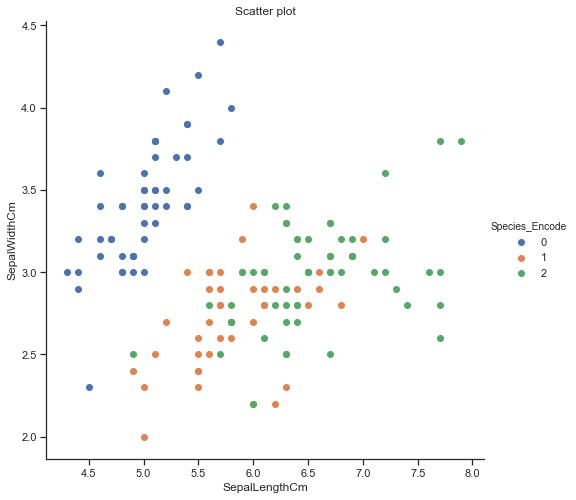

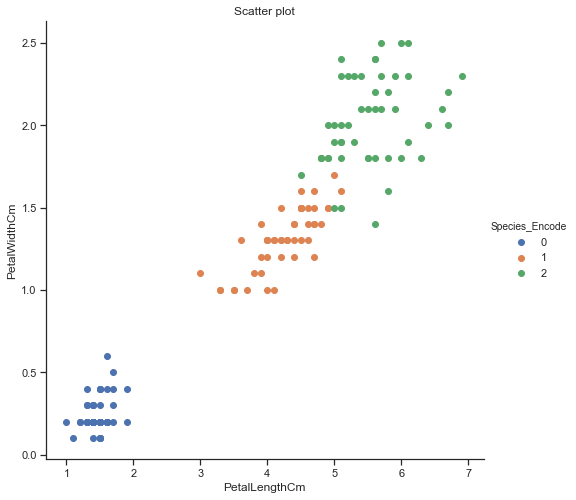

In [46]:
import seaborn as sns
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(df,hue="Species_Encode", size=7).map(plt.scatter,"SepalLengthCm", "SepalWidthCm").add_legend()
plt.title('Scatter plot')
sns.FacetGrid(df,hue="Species_Encode", size=7).map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()
plt.title('Scatter plot')
#df1 = iris[["sepal_length", "sepal_width",'species']]

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B3388AE48>,
      dtype=object)

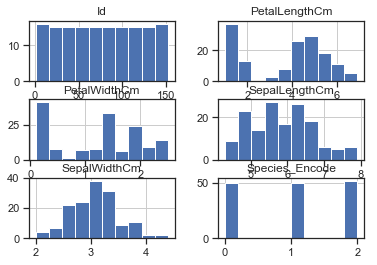

In [47]:
df.hist()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


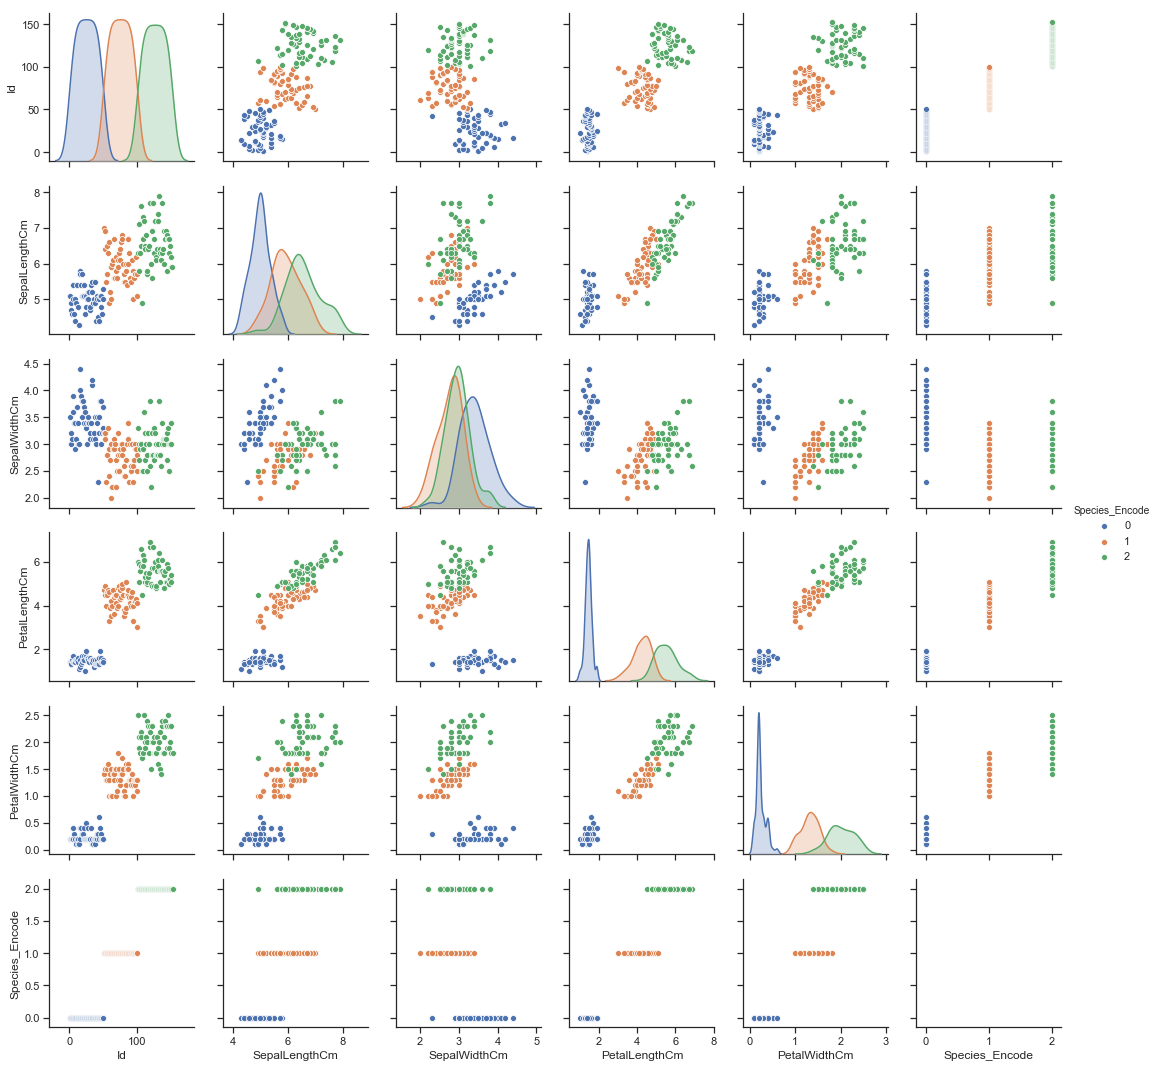

In [48]:
sns.set(style="ticks")

sns.pairplot(df, hue="Species_Encode")

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [101]:
df=df.replace(np.NaN,0)

In [107]:
df.isnull().any()

Id                False
SepalLengthCm     False
SepalWidthCm      False
PetalLengthCm     False
PetalWidthCm      False
Species           False
Species_Encode    False
dtype: bool

In [108]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encode
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.805263,3.013816,3.709211,1.194737,1.013158
std,44.022721,0.949366,0.554458,1.804606,0.765895,0.821780
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.750000,5.100000,2.800000,1.500000,0.300000,0.000000
50%,76.500000,5.800000,3.000000,4.300000,1.300000,1.000000
75%,114.250000,6.400000,3.300000,5.100000,1.800000,2.000000
max,152.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#Drop Id variable from data

### Correlation among all variables and give your insights (1 Marks)

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [109]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encode
Id,1.000000,0.539500,-0.427175,0.793490,0.864447,0.942753
SepalLengthCm,0.539500,1.000000,0.145802,0.816560,0.668652,0.622970
SepalWidthCm,-0.427175,0.145802,1.000000,-0.167316,-0.246073,-0.410273
PetalLengthCm,0.793490,0.816560,-0.167316,1.000000,0.936151,0.879652
PetalWidthCm,0.864447,0.668652,-0.246073,0.936151,1.000000,0.931308
Species_Encode,0.942753,0.622970,-0.410273,0.879652,0.931308,1.000000


In [ ]:
# since petal length and petal width columns have high corelating with Species Encode, I will include these columns in my model.

### Split data in Training and Validation in 80:20 (1 Marks)

In [ ]:
### SPLITTING INTO TRAINING AND TEST SETS

In [146]:
from sklearn import model_selection

X = df[['PetalLengthCm','PetalWidthCm']]
Y = df["Species_Encode"]
validation_size = 0.20
seed = 7


### Do Feature Scaling ( 1 Marks)

In [ ]:
# Use StandardScaler or similar methods

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [148]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [149]:
X.sum()

PetalLengthCm    563.8
PetalWidthCm     181.6
dtype: float64

In [150]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Train and Fit NaiveBayes Model(2 Marks)

In [ ]:
#Fit the model

In [151]:
clf = GaussianNB()
GNB = clf.fit(X_train, Y_train)

In [152]:
GNB.predict_proba(X_train)

array([[9.99999989e-001, 1.18760585e-015, 1.11437982e-008],
       [8.14271652e-254, 2.54406023e-012, 1.00000000e+000],
       [9.99999996e-001, 8.07353285e-017, 4.00459289e-009],
       [9.99999969e-001, 1.45686323e-017, 3.06295086e-008],
       [1.26118826e-166, 3.53599439e-003, 9.96464006e-001],
       [9.07017215e-211, 8.23302979e-007, 9.99999177e-001],
       [1.33509196e-211, 1.83092769e-008, 9.99999982e-001],
       [9.99999996e-001, 3.32817255e-017, 3.99841035e-009],
       [9.99999548e-001, 6.47770283e-012, 4.52475578e-007],
       [9.99999990e-001, 1.85474836e-015, 1.03829211e-008],
       [4.28401216e-149, 4.47249138e-003, 9.95527509e-001],
       [8.36839178e-123, 5.94357781e-001, 4.05642219e-001],
       [2.96432559e-054, 9.81455476e-001, 1.85445238e-002],
       [4.97964994e-153, 1.41718618e-001, 8.58281382e-001],
       [1.27418115e-197, 3.08529180e-006, 9.99996915e-001],
       [1.41106157e-058, 9.76623036e-001, 2.33769635e-002],
       [3.60935752e-098, 8.65502445e-001

In [ ]:
#Predict

In [153]:
target_pred = clf.predict(X_validation)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [ ]:
# show Confusion Matrix

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score   
confusion_matrix = (
    {"conf_matx": confusion_matrix(Y_validation,target_pred),
     "accuracy": accuracy_score(Y_validation,target_pred)
    })

print("confusion matrix \n" , confusion_matrix["conf_matx"], 
      "\n\nclassification accuracy ", confusion_matrix["accuracy"]
      )


confusion matrix 
 [[ 8  0  0]
 [ 0  9  1]
 [ 0  0 13]] 

classification accuracy  0.967741935483871


In [ ]:
# show accuracy

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_validation, target_pred)

0.967741935483871

In [ ]:
#Show precision and Recall metrics

## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [1]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [138]:
df1=pd.read_csv("Iris.csv")

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [139]:
df1.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,152.000000,151.000000,150.000000,150.000000,151.000000,152
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,52
mean,76.500000,5.843709,3.054000,3.758667,1.202649,NaN
std,44.022721,0.825314,0.433594,1.764420,0.762185,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.750000,5.100000,2.800000,1.600000,0.300000,NaN
50%,76.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,114.250000,6.400000,3.300000,5.100000,1.800000,NaN


In [141]:
df1['SepalLengthCm']=df1['SepalLengthCm'].replace(np.NaN,5.8)
df1['SepalWidthCm']=df1['SepalWidthCm'].replace(np.NaN,3)
df1['PetalLengthCm']=df1['PetalLengthCm'].replace(np.NaN,4.35)
df1['PetalWidthCm']=df1['PetalWidthCm'].replace(np.NaN,1.3)

In [143]:
df1.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [144]:
lb_make1 = LabelEncoder()
df1["Species_Encode"] = lb_make.fit_transform(df1["Species"])
df1[["Species", "Species_Encode"]]

,Species,Species_Encode
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
5,Iris-setosa,0
6,Iris-setosa,0
7,Iris-setosa,0
8,Iris-setosa,0
9,Iris-setosa,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [145]:
df1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encode
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species_Encode,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [ ]:
#dropping sepal width column as it has less correlation 

## Question 6

*Plot the scatter matrix for all the variables.*

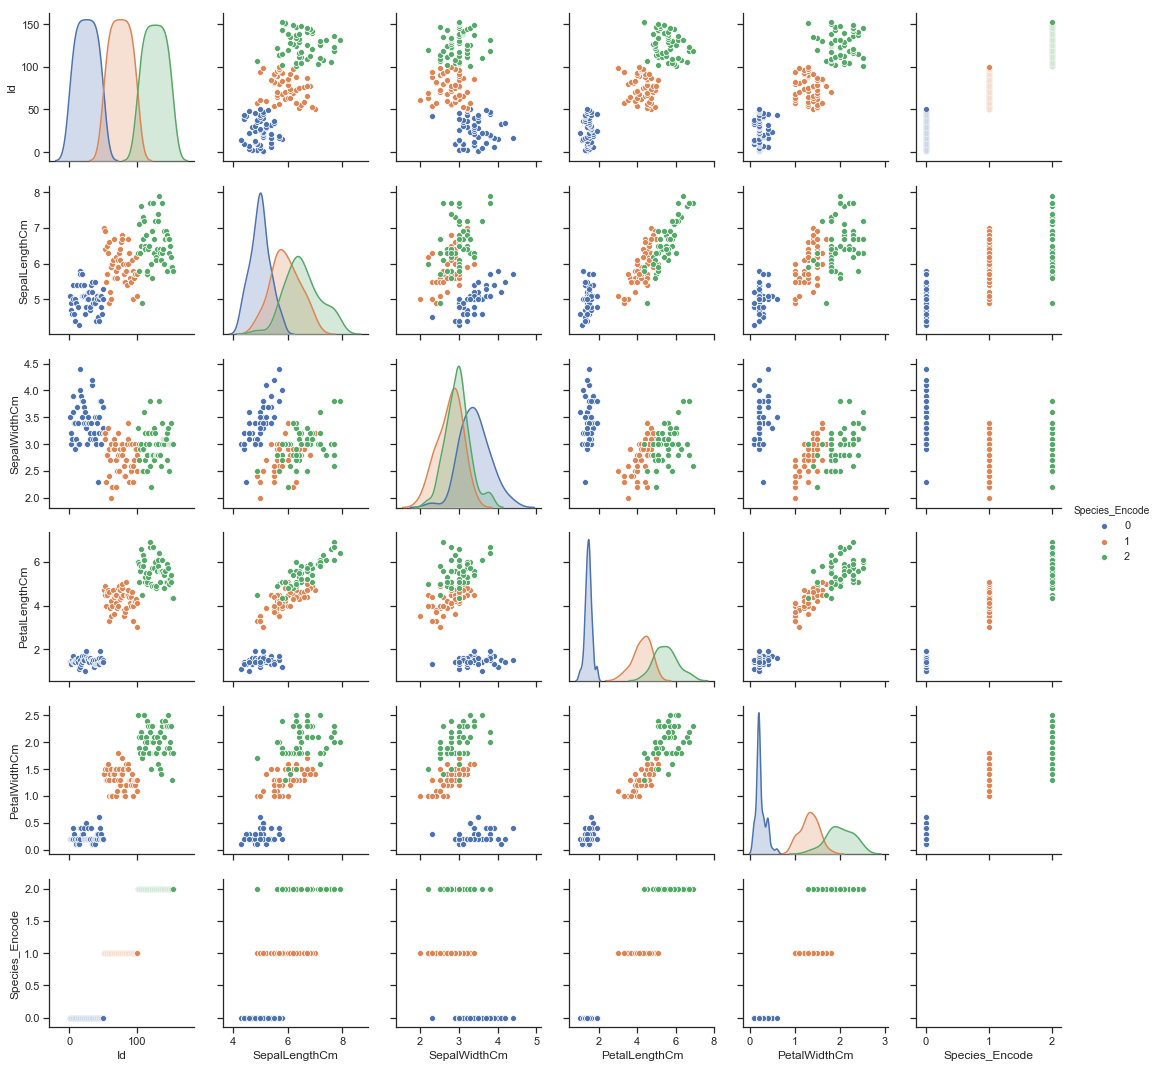

In [158]:
sns.set(style="ticks")

sns.pairplot(df1, hue="Species_Encode")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [164]:
from sklearn import model_selection

X1 = df1[['PetalLengthCm','PetalWidthCm','SepalLengthCm']]
Y1 = df1["Species_Encode"]
validation_size = 0.20
seed = 7

In [163]:
X1_train, X1_validation, Y1_train, Y1_validation = model_selection.train_test_split(X1, Y1, test_size=validation_size, random_state=seed)

In [165]:
X1_train.shape

(121, 3)

In [166]:
Y1_train.shape

(121,)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [173]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', 
                           metric = 'euclidean')
NNH.fit(X1_train, Y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [174]:
NNH.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')>

In [176]:
NNH.predict_proba

<bound method KNeighborsClassifier.predict_proba of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')>

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [169]:
from sklearn.model_selection import GridSearchCV

k = np.arange(155,161,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, scoring = 'roc_auc', cv=10)
GS.Fit(X1_train, Y1_train)

AttributeError: 'GridSearchCV' object has no attribute 'Fit'

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*